In [105]:
setwd('/import/DB/zhang/bulk/')

In [ ]:
load('./data1.rda')

head(data1,2)

library(dplyr)

expr = data1

head(expr,2)

Type=c(rep(1,23),rep(0,13)) 

Type

x = as.matrix(expr)
y = Type

In [114]:
library(randomForest)

In [115]:
options(repr.plot.width = 6)

In [116]:
set.seed(111)

In [117]:
rf = randomForest(as.factor(y)~.,data = x,ntree =1000,important=TRUE,proximity=TRUE)

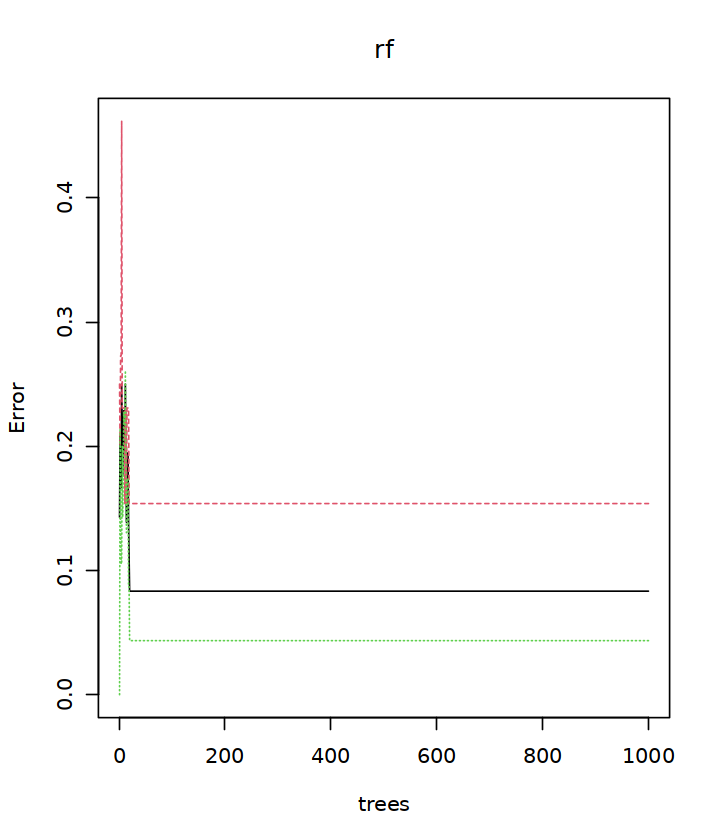

In [118]:
plot(rf)

In [119]:
pdf('forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

In [120]:
trees = which.min(rf$err.rate[,1])

In [121]:
rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

In [122]:
importance = importance(rf)

In [123]:
pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

png 
  2

In [124]:
options(repr.plot.width = 4)

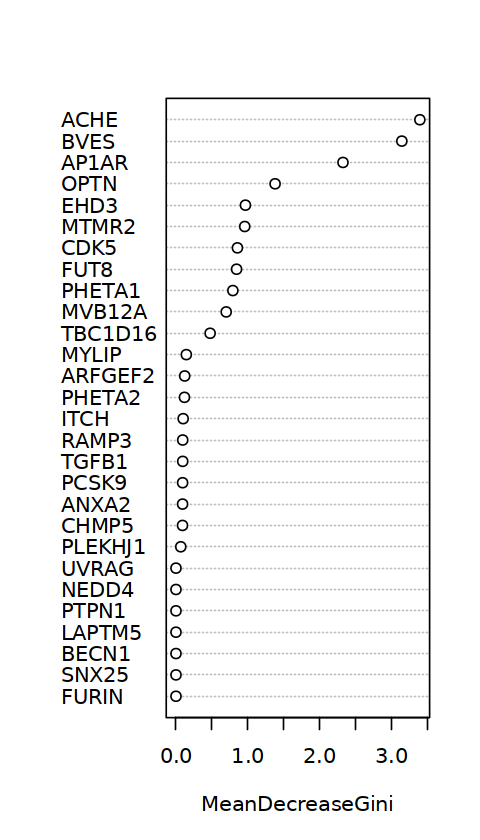

In [125]:
varImpPlot(rf,main = '')

In [126]:
rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

In [127]:
rfGenes

ACHE       BVES      AP1AR       OPTN       EHD3      MTMR2       CDK5 
3.39714726 3.14620143 2.32638889 1.38058069 0.96744048 0.95772059 0.85590338 
      FUT8     PHETA1     MVB12A    TBC1D16      MYLIP    ARFGEF2     PHETA2 
0.84404040 0.79227941 0.69960317 0.47564646 0.14404762 0.12155694 0.11794872 
      ITCH      RAMP3      TGFB1      PCSK9      ANXA2      CHMP5    PLEKHJ1 
0.10000000 0.09375000 0.09375000 0.09230769 0.09166667 0.09090909 0.06666667 
     UVRAG      NEDD4      PTPN1     LAPTM5      BECN1      SNX25      FURIN 
0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000

In [130]:
model.gene = names(rfGenes)[1:11]

In [102]:
rfGenes=names(rfGenes[rfGenes>11]) 
write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

In [103]:
rfGenes

character(0)

In [29]:
sigExp=expr[rfGenes,]
write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

### svm

In [30]:
library(tidyverse)
library(glmnet)
library(VennDiagram)
library(e1071)
library(caret)
library(randomForest)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.4
v ggplot2   3.4.3     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.1     v tidyr     1.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x randomForest::combine() mas

In [31]:
y=as.numeric(as.factor(Type))

In [32]:
library(future)
plan("multisession",workers=30)

Warning message:
"package 'future' was built under R version 4.2.3"

Attaching package: 'future'


The following object is masked from 'package:caret':

    cluster




In [33]:
set.seed(1)
rfeControl = rfeControl(functions = caretFuncs,
                        method = "cv", # 默认自助法重采样 boot
                        saveDetails = T, # 保存预测值和变量重要性
                        number = 5, # 重抽样次数
                        allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
                        )

In [34]:
Profile=rfe(x=x,y=y,sizes = c(1:10),
    rfeControl =  rfeControl,
    methods="svmRadial")

Warning message in train.default(x, y, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

In [35]:
pdf(file="SVM-RFE.pdf", width=6, height=5.5)
par(las=1)
x= Profile$results$Variables 
y =Profile$results$RMSE
plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
lines(x, y, col="darkgreen")
wmin=which.min(y) 
wmin.x=x[wmin] 
wmin.y=y[wmin]
points(wmin.x, wmin.y, col="blue", pch=16)
text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
dev.off()

png 
  2

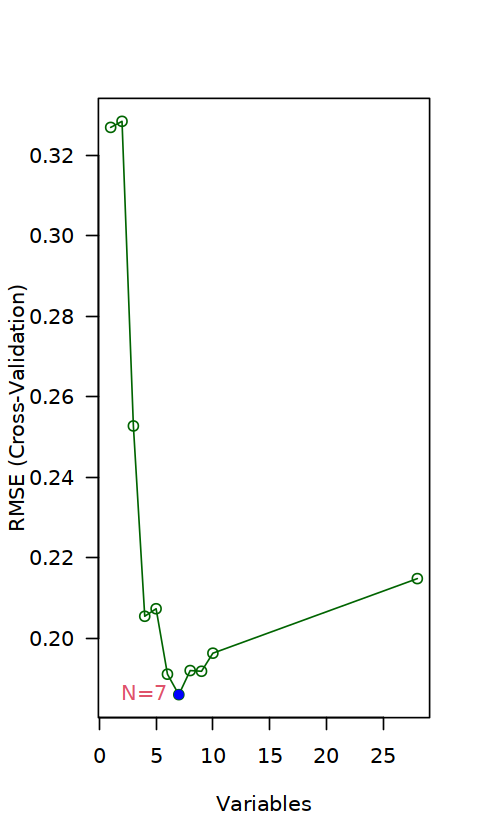

In [36]:
par(las=1)
x= Profile$results$Variables 
y =Profile$results$RMSE
plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
lines(x, y, col="darkgreen")
wmin=which.min(y) 
wmin.x=x[wmin] 
wmin.y=y[wmin]
points(wmin.x, wmin.y, col="blue", pch=16)
text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

In [37]:
#输出
featureGenes = Profile$optVariables
write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

In [38]:
featureGenes

[1] "BVES"   "OPTN"   "ACHE"   "PHETA2" "MTMR2"  "AP1AR"  "FUT8"

### Boruta

In [39]:
library(Boruta)

In [40]:
x = as.matrix(expr)
y = Type

In [41]:
set.seed(1)
boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
       maxRuns=300)

In [42]:
boruta

Boruta performed 299 iterations in 14.70709 secs.
 19 attributes confirmed important: ACHE, AP1AR, ARFGEF2, BVES, CDK5
and 14 more;
 8 attributes confirmed unimportant: ANXA2, BECN1, NEDD4, PCSK9,
PLEKHJ1 and 3 more;
 1 tentative attributes left: TBC1D16;

In [43]:
table(boruta$finalDecision)


Tentative Confirmed  Rejected 
        1        19         8 

In [44]:
boruta$finalDecision

ACHE      BVES     MYLIP      OPTN     MTMR2      EHD3    PHETA2     ANXA2 
Confirmed Confirmed Confirmed Confirmed Confirmed Confirmed Confirmed  Rejected 
  PLEKHJ1      CDK5     UVRAG     NEDD4      FUT8     CHMP5     PTPN1    LAPTM5 
 Rejected Confirmed  Rejected  Rejected Confirmed Confirmed Confirmed Confirmed 
    RAMP3    MVB12A     BECN1      ITCH     SNX25     PCSK9     FURIN     AP1AR 
 Rejected Confirmed  Rejected Confirmed Confirmed  Rejected Confirmed Confirmed 
    TGFB1   ARFGEF2    PHETA1   TBC1D16 
 Rejected Confirmed Confirmed Tentative 
Levels: Tentative Confirmed Rejected

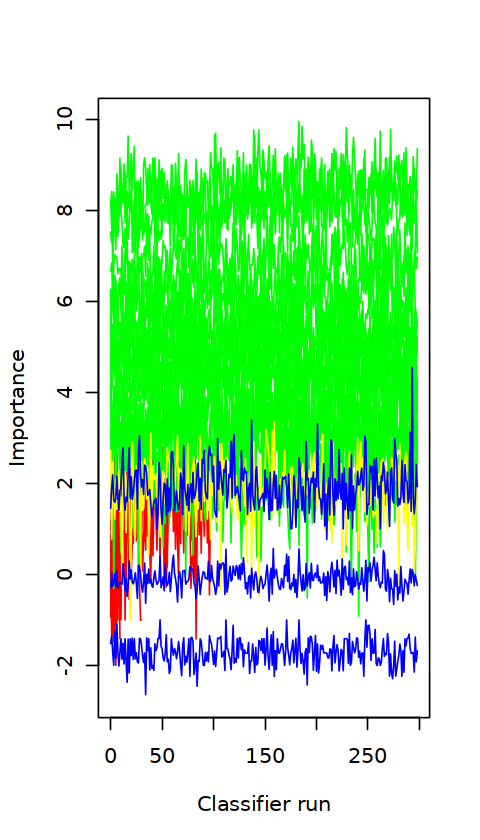

In [45]:
Boruta::plotImpHistory(boruta)

In [46]:
library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


Welcome to YSX package which is a collection of useful scripts.
This package does not require you install all depended packages, since one may not need all functions in this package.
However, when there is a message implying some functions are missing,please install these packages manually.
Or more specially, check Plot.Rmd in vignettes first.




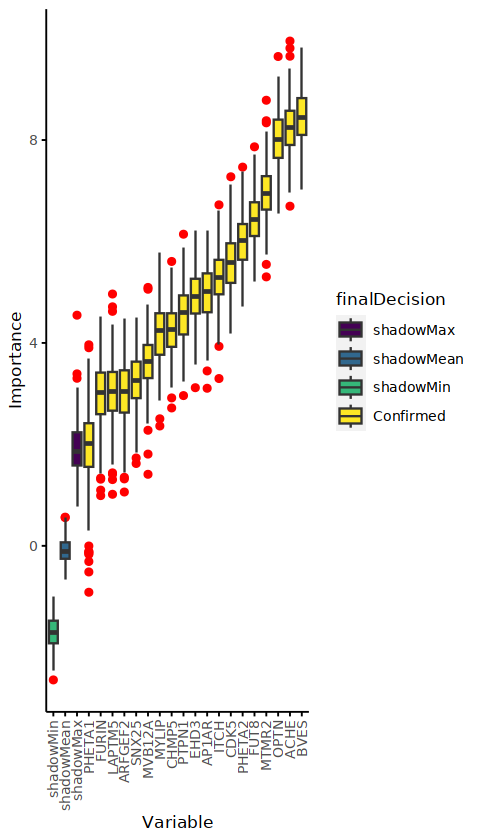

In [47]:
library(YSX)

sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
           legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
           xtics_angle = 90)

In [62]:
Group =c(rep("OS",23),rep("Con",13)) 

In [63]:
expr3 = cbind(Group,expr)

In [64]:
set.seed(157)  
index <-  which( (1:nrow(expr3))%%3 == 0 )
train <- expr3[-index,]
test <- expr3[index,]

In [65]:
table(test$Group)


Con  OS 
  5   7 

In [66]:
library("xgboost")
library("Matrix")
train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)

In [67]:
train_label <- as.numeric(train$Group == 'OS')
test_label <-  as.numeric(test$Group == 'OS')
all_label <-  as.numeric(expr3$Group == 'OS')

In [68]:
all_label

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0

In [69]:
train_fin <- list(data=train_matrix,label=train_label) 
test_fin <- list(data=test_matrix,label=test_label) 
all_fin <- list(data=all_matrix,label=all_label) 

dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

In [70]:
xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
  objective='binary:logistic', nround=25)

[1]	train-logloss:0.397840 
[2]	train-logloss:0.257626 
[3]	train-logloss:0.181574 
[4]	train-logloss:0.135468 
[5]	train-logloss:0.104120 
[6]	train-logloss:0.082829 
[7]	train-logloss:0.068198 
[8]	train-logloss:0.057282 
[9]	train-logloss:0.056927 
[10]	train-logloss:0.056761 
[11]	train-logloss:0.056685 
[12]	train-logloss:0.056649 
[13]	train-logloss:0.056633 
[14]	train-logloss:0.056625 
[15]	train-logloss:0.056622 
[16]	train-logloss:0.056620 
[17]	train-logloss:0.056619 
[18]	train-logloss:0.056619 
[19]	train-logloss:0.056619 
[20]	train-logloss:0.056619 
[21]	train-logloss:0.056619 
[22]	train-logloss:0.056619 
[23]	train-logloss:0.056619 
[24]	train-logloss:0.056619 
[25]	train-logloss:0.056619 


In [71]:
xgb

##### xgb.Booster
raw: 21.4 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, max_depth = 6, eta = 0.5, objective = "binary:logistic")
params (as set within xgb.train):
  max_depth = "6", eta = "0.5", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 28 
niter: 25
nfeatures : 28 
evaluation_log:
    iter train_logloss
       1    0.39784028
       2    0.25762646
---                   
      24    0.05661869
      25    0.05661870

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
ACHE,0.53033146,0.3826594,0.375
BVES,0.22105712,0.1987492,0.125
MTMR2,0.15376016,0.2328029,0.250
FUT8,0.09485126,0.1857885,0.250


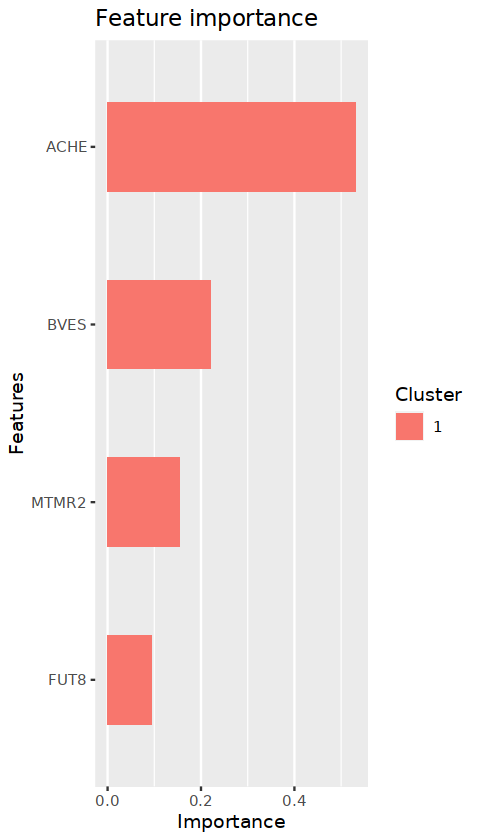

In [72]:
importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
head(importance)
xgb.ggplot.importance(importance)

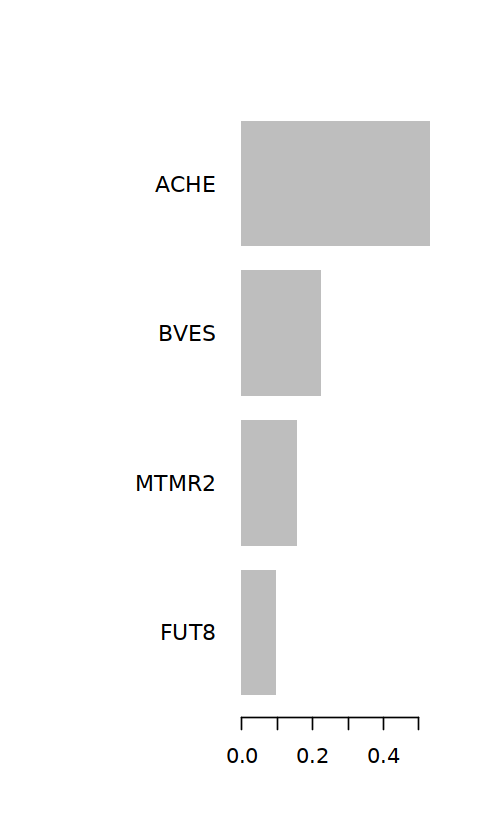

In [73]:
xgb.plot.importance(importance)

### 韦恩图

In [ ]:
RF.gene = colnames(sigExp)
SVF.RFE.gene = featureGenes
XGBoost.gene = importance$Feature

In [ ]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed')) %>% dplyr::select(Variable) %>% unique()

In [ ]:
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [ ]:
list1 = list(Boruta.gene,SVF.RFE.gene, RF.gene,XGBoost.gene) #

In [ ]:
data =  as.data.frame (do.call (cbind, list1))

In [ ]:

library(venn)
        library(VennDiagram)
        color=c( "#3C5488B2","#00A087B2", 
             "#F39B7FB2","#91D1C2B2", 
             "#8491B4B2", "#DC0000B2", 
             "#7E6148B2","yellow", 
             "darkolivegreen1", "lightskyblue", 
             "darkgreen", "deeppink", "khaki2", 
             "firebrick", "brown1", "darkorange1", 
             "cyan1", "royalblue4", "darksalmon", 
             "darkgoldenrod1", "darkseagreen", "darkorchid")

    if (ncol(data) == 2){
        sample_list <- list(Boruta.gene = data[,1], XGBoost.gene = data[,2])
    }else if(ncol(data) == 3){
        sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
    }else if(ncol(data) == 4){
        sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
    }else{
        sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
    }
    
    q <- venn.diagram(sample_list,filename = NULL,
             fill = color[1:(length(sample_list))],
             alpha = 0.50, cat.col = rep('black', ncol(data)), 
             col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
                             )
    pdf(paste0('./',"venn.pdf"))
    grid.draw(q)
    dev.off()

In [ ]:
options(repr.plot.width = 6)

In [ ]:
grid.draw(q)

In [ ]:
model.gene = intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),SVF.RFE.gene)#

In [131]:
model.gene

[1] "ACHE"    "BVES"    "AP1AR"   "OPTN"    "EHD3"    "MTMR2"   "CDK5"   
 [8] "FUT8"    "PHETA1"  "MVB12A"  "TBC1D16"

In [132]:
set.seed(1234)
expr3 = cbind(Group,expr)

In [133]:
expr3[expr3$Group =='OS',]$Group<-1

In [134]:
expr3[expr3$Group =='Con',]$Group<-0
expr3$Group = as.numeric(expr3$Group)

In [135]:
expr4 = expr3 %>% dplyr::select(c(Group,model.gene))

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
i Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(model.gene)

  # Now:
  data %>% select(all_of(model.gene))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."


In [136]:
dim(expr4)

[1] 36 12

In [137]:
head(expr4,4)

,Group,ACHE,BVES,AP1AR,OPTN,EHD3,MTMR2,CDK5,FUT8,PHETA1,MVB12A,TBC1D16
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM6733214_T103,1,1.5502254,0.7751127,8.526240,44.43979,2.583709,25.32035,14.46877,9.559723,24.80361,18.34433,14.98551
GSM6733215_T105,1,0.3841613,2.3049676,6.530741,49.94096,12.485241,10.37235,49.94096,13.445644,146.74960,75.29561,29.77250
GSM6733216_T109,1,0.3332053,7.9969265,11.995390,61.30977,6.997311,26.32322,17.32667,13.661416,23.99078,38.98502,21.99155
GSM6733217_T110,1,0.7859662,4.7157972,7.335685,32.22461,20.697110,21.74507,39.03632,12.051482,86.71827,28.55677,31.96263


In [138]:
library(caret)
library(ggplot2)

### 这里使用48个基因先看看情况



In [139]:
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, # 显示95%CI
         #percent=TRUE, # 是否需要以百分比显示
         smooth=FALSE,# 是否平滑曲线
         levels=c(0,1),direction="<" #设置分组方向
         )
    if (res$auc > 0.5){
        print(paste0(i,' ',res$auc))
        p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + # 设置背景
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0(i,'.ROC.pdf'))
}else{
        
}

    
    }

[1] "AP1AR 0.94314381270903"


Saving 6.67 x 6.67 in image


[1] "EHD3 0.949832775919732"


Saving 6.67 x 6.67 in image


[1] "MTMR2 0.983277591973244"


Saving 6.67 x 6.67 in image


[1] "CDK5 0.969899665551839"


Saving 6.67 x 6.67 in image


[1] "FUT8 0.979933110367893"


Saving 6.67 x 6.67 in image


[1] "PHETA1 0.896321070234114"


Saving 6.67 x 6.67 in image


[1] "MVB12A 0.933110367892977"


Saving 6.67 x 6.67 in image


[1] "TBC1D16 0.882943143812709"


Saving 6.67 x 6.67 in image


### 批量单因素逻辑回归

In [72]:
#expr4 = expr3

In [140]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following object is masked from 'package:purrr':

    compact


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: Hmisc

Warning message:
"package 'Hmisc' was built under R version 4.2.3"

Attaching package: 'Hmisc'


The following objects are masked from 'package:plyr':

    is.discrete, summarize


The following object is masked from 'package:e1071':

    impute


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    for

In [141]:
varsU<-names(expr4[,2:dim(expr4)[2]])

In [142]:
Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Wa

In [143]:
Result

,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ACHE,-0.28570276,0.09705165,-2.943822,0.003241866,0.7514860,0.5764901,0.8686462,ACHE
BVES,-0.38444384,0.20205688,-1.902652,0.057086027,0.6808292,0.3331171,0.8561487,BVES
AP1AR,0.96136857,0.31426007,3.059150,0.002219663,2.6152732,1.5927792,5.7182111,AP1AR
OPTN,-0.09871326,0.04515976,-2.185868,0.028825294,0.9060025,0.7824149,0.9595956,OPTN
EHD3,1.02738832,0.37738344,2.722399,0.006480983,2.7937599,1.5870782,7.4346787,EHD3
MTMR2,0.61898419,0.26467623,2.338647,0.019353727,1.8570407,1.3151363,4.2183054,MTMR2
CDK5,0.52138621,0.20438320,2.551023,0.010740728,1.6843609,1.2371968,2.8478490,CDK5
FUT8,1.00000736,0.37797002,2.645732,0.008151438,2.7183018,1.5944104,8.1443589,FUT8
PHETA1,0.22047130,0.08582218,2.568932,0.010201261,1.2466641,1.0853999,1.5329014,PHETA1


In [144]:
Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.01]) 


In [163]:
tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

In [164]:
Uni_log[tzgene,]

,Estimate,P,OR,CIlower,CIupper,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ACHE,-0.28570276,0.003241866,0.7514860,0.5764901,0.8686462,ACHE
AP1AR,0.96136857,0.002219663,2.6152732,1.5927792,5.7182111,AP1AR
OPTN,-0.09871326,0.028825294,0.9060025,0.7824149,0.9595956,OPTN
EHD3,1.02738832,0.006480983,2.7937599,1.5870782,7.4346787,EHD3
MTMR2,0.61898419,0.019353727,1.8570407,1.3151363,4.2183054,MTMR2
CDK5,0.52138621,0.010740728,1.6843609,1.2371968,2.8478490,CDK5
FUT8,1.00000736,0.008151438,2.7183018,1.5944104,8.1443589,FUT8
PHETA1,0.22047130,0.010201261,1.2466641,1.0853999,1.5329014,PHETA1
MVB12A,0.22262188,0.005396996,1.2493481,1.1063441,1.5294103,MVB12A


In [171]:
tzgene

[1] "ACHE"    "AP1AR"   "OPTN"    "EHD3"    "MTMR2"   "CDK5"    "FUT8"   
 [8] "PHETA1"  "MVB12A"  "TBC1D16"

### 多因素分析

In [165]:
tzgene

[1] "ACHE"    "AP1AR"   "OPTN"    "EHD3"    "MTMR2"   "CDK5"    "FUT8"   
 [8] "PHETA1"  "MVB12A"  "TBC1D16"

In [166]:
#tzgene1 = tzgene[-5]

In [167]:
data = expr4[,c('Group',tzgene)]
data$Group = factor(data$Group,levels = c(1,0))

In [168]:
fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.475e-05  -2.110e-08  -2.110e-08   2.110e-08   1.813e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)  3.118e+01  1.991e+05       0        1
ACHE         1.301e-01  4.773e+03       0        1
AP1AR        2.035e+00  6.758e+04       0        1
OPTN         1.681e-01  1.155e+03       0        1
EHD3         2.014e+00  2.549e+04       0        1
MTMR2       -4.762e+00  2.591e+04       0        1
CDK5        -2.720e+00  2.473e+04       0        1
FUT8        -2.905e+00  1.253e+04       0        1
PHETA1      -1.152e-01  4.475e+03       0        1
MVB12A       7.260e-01  1.235e+04       0        1
TBC1D16      2.821e+00  7.640e+03       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4.7092e+01  on 35  degrees of freedom
Residual deviance: 1.1302e-09  on 25  degrees o

In [169]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=22
Group ~ ACHE + AP1AR + OPTN + EHD3 + MTMR2 + CDK5 + FUT8 + PHETA1 + 
    MVB12A + TBC1D16



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

          Df   Deviance AIC
- PHETA1   1 1.1527e-09  20
- MVB12A   1 1.1780e-09  20
- EHD3     1 1.1827e-09  20
- AP1AR    1 1.1866e-09  20
- OPTN     1 1.2350e-09  20
- ACHE     1 1.2415e-09  20
- FUT8     1 1.7333e-09  20
- CDK5     1 1.7665e-09  20
- TBC1D16  1 1.8280e-09  20
- MTMR2    1 2.0099e-09  20
<none>       1.1302e-09  22


Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=20
Group ~ ACHE + AP1AR + OPTN + EHD3 + MTMR2 + CDK5 + FUT8 + MVB12A + 
    TBC1D16



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

          Df   Deviance AIC
- AP1AR    1 1.1946e-09  18
- MVB12A   1 1.2044e-09  18
- EHD3     1 1.2149e-09  18
- ACHE     1 1.2496e-09  18
- OPTN     1 1.2609e-09  18
- FUT8     1 1.7517e-09  18
- CDK5     1 2.0741e-09  18
- TBC1D16  1 2.1094e-09  18
- MTMR2    1 2.1919e-09  18
<none>       1.1527e-09  20
+ PHETA1   1 1.1302e-09  22


Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=18
Group ~ ACHE + OPTN + EHD3 + MTMR2 + CDK5 + FUT8 + MVB12A + TBC1D16



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

          Df   Deviance AIC
- ACHE     1 1.2634e-09  16
- EHD3     1 1.3937e-09  16
- MVB12A   1 1.4495e-09  16
- OPTN     1 1.5925e-09  16
- FUT8     1 1.7933e-09  16
- TBC1D16  1 2.1323e-09  16
- CDK5     1 2.6318e-09  16
- MTMR2    1 3.4684e-09  16
<none>       1.1946e-09  18
+ AP1AR    1 1.1527e-09  20
+ PHETA1   1 1.1866e-09  20


Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=16
Group ~ OPTN + EHD3 + MTMR2 + CDK5 + FUT8 + MVB12A + TBC1D16



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

          Df   Deviance AIC
- EHD3     1 1.4807e-09  14
- MVB12A   1 1.5401e-09  14
- FUT8     1 1.9321e-09  14
- TBC1D16  1 2.3310e-09  14
- OPTN     1 2.5325e-09  14
- CDK5     1 2.8023e-09  14
- MTMR2    1 3.8006e-09  14
<none>       1.2634e-09  16
+ ACHE     1 1.1946e-09  18
+ AP1AR    1 1.2496e-09  18
+ PHETA1   1 1.2518e-09  18


Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=14
Group ~ OPTN + MTMR2 + CDK5 + FUT8 + MVB12A + TBC1D16



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

          Df   Deviance AIC
- FUT8     1 2.0275e-09  12
- MVB12A   1 2.3739e-09  12
- TBC1D16  1 2.7336e-09  12
- CDK5     1 3.1514e-09  12
- OPTN     1 3.4158e-09  12
- MTMR2    1 4.0024e-09  12
<none>       1.4807e-09  14
+ EHD3     1 1.2634e-09  16
+ ACHE     1 1.3937e-09  16
+ AP1AR    1 1.4107e-09  16
+ PHETA1   1 1.4755e-09  16


Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=12
Group ~ OPTN + MTMR2 + CDK5 + MVB12A + TBC1D16



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

          Df   Deviance AIC
- MVB12A   1 2.8172e-09  10
- TBC1D16  1 4.0140e-09  10
- MTMR2    1 4.0971e-09  10
- CDK5     1 6.8473e-09  10
- OPTN     1 9.0505e-09  10
<none>       2.0275e-09  12
+ FUT8     1 1.4807e-09  14
+ ACHE     1 1.8061e-09  14
+ PHETA1   1 1.9097e-09  14
+ EHD3     1 1.9321e-09  14
+ AP1AR    1 2.0229e-09  14


Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=10
Group ~ OPTN + MTMR2 + CDK5 + TBC1D16



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

          Df   Deviance AIC
- MTMR2    1 4.1870e-09   8
- TBC1D16  1 6.2100e-09   8
- OPTN     1 2.0496e-08   8
- CDK5     1 3.8321e-08   8
<none>       2.8170e-09  10
+ PHETA1   1 1.9560e-09  12
+ EHD3     1 2.0250e-09  12
+ MVB12A   1 2.0280e-09  12
+ AP1AR    1 2.0620e-09  12
+ FUT8     1 2.3740e-09  12
+ ACHE     1 2.6480e-09  12


Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=8
Group ~ OPTN + CDK5 + TBC1D16



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

          Df Deviance    AIC
- TBC1D16  1   0.0000  6.000
<none>         0.0000  8.000
+ MTMR2    1   0.0000 10.000
+ PHETA1   1   0.0000 10.000
+ AP1AR    1   0.0000 10.000
+ ACHE     1   0.0000 10.000
+ FUT8     1   0.0000 10.000
+ EHD3     1   0.0000 10.000
+ MVB12A   1   0.0000 10.000
- CDK5     1   8.0309 14.031
- OPTN     1  15.4891 21.489


Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=6
Group ~ OPTN + CDK5



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

          Df Deviance    AIC
<none>         0.0000  6.000
+ TBC1D16  1   0.0000  8.000
+ FUT8     1   0.0000  8.000
+ ACHE     1   0.0000  8.000
+ PHETA1   1   0.0000  8.000
+ MVB12A   1   0.0000  8.000
+ EHD3     1   0.0000  8.000
+ MTMR2    1   0.0000  8.000
+ AP1AR    1   0.0000  8.000
- CDK5     1   8.0756 12.076
- OPTN     1  15.6894 19.689



Call:
glm(formula = Group ~ OPTN + CDK5, family = binomial(), data = data)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-5.097e-05  -2.100e-08  -2.100e-08   2.100e-08   5.388e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)     6.5008 59093.5318   0.000    1.000
OPTN            0.8568   631.8637   0.001    0.999
CDK5           -7.3415  4576.8308  -0.002    0.999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4.7092e+01  on 35  degrees of freedom
Residual deviance: 6.3532e-09  on 33  degrees of freedom
AIC: 6

Number of Fisher Scoring iterations: 25


In [170]:
# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(logit.step)

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted proba

,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),6.501,0,665.682(NA~Inf),1.000
OPTN,0.857,0,2.356(0~2673757289402.85),0.999
CDK5,-7.341,0,0.001(0~7.72681447120332e+178),0.999


In [86]:
set.seed(21)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=5,times=10)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~TNFSF14+CCNA2+MARCKS+SGOL1+SAP130,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=test)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(test[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases



[1] 0.9376894

In [87]:
num <- which.max(auc_value)
print(num)

[1] 2


In [88]:
fold_test <- data[folds[[num]],]   
fold_train <- data[-folds[[num]],]

In [89]:
fold_pre <- glm(Group~TNFSF14+CCNA2+MARCKS+SGOL1+SAP130,data=fold_train,family=binomial())

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [90]:
fold_predict <- predict(fold_pre,type='response',newdata=fold_test)

In [138]:
options(repr.plot.width = 6)

Setting levels: control = 1, case = 2

Setting direction: controls < cases



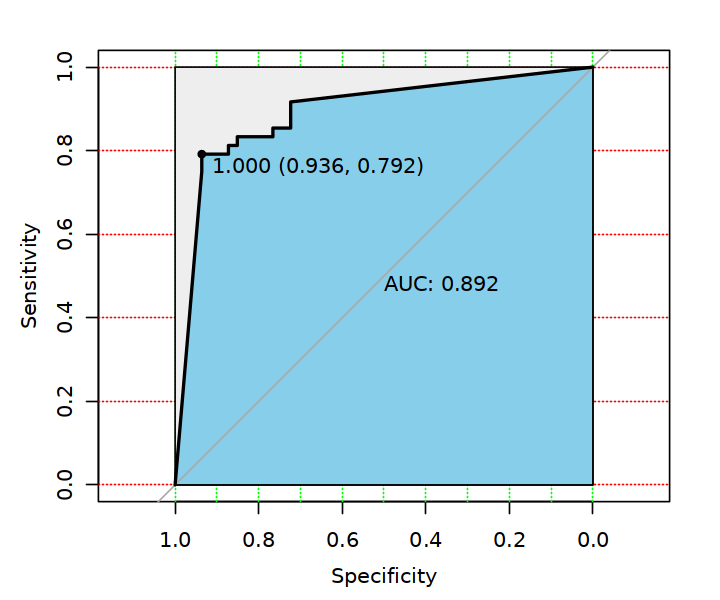

In [139]:
roc_curve <- pROC::roc(as.numeric(fold_test$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

In [140]:
library(ROCR)

dd<-datadist(data)  #开始打包数据
options(datadist="dd")

data$Group = as.factor(data$Group)

fit1 <- lrm(Group~TNFSF14+CCNA2+MARCKS+SGOL1+SAP130, data=data,x=T,y=T)


fit1

#  https://blog.csdn.net/Ayue0616/article/details/126601832

# cal1 <- calibrate(fit1, method='boot', B=1000) 
# plot(cal1,xlim=c(0,1.0),ylim=c(0,1.0))

### https://blog.51cto.com/u_15172991/5428282  模型图的解释参考链接

# https://ayueme.github.io/R_clinical_model/nomogram-essential.html

# https://blog.csdn.net/Dr_long1996/article/details/135446784

save(fit1,data,file = 'train.fit1.rda')

#列线图代码只能在Rstudio话

# library('regplot')
# regplot(fit1,
#         plots = c("violin", "boxes"), ##连续性变量形状，可选"no plot" "density" "boxes" "ecdf" "bars" "boxplot" "violin" "bean" "spikes"；分类变量的形状，可选"no plot" "boxes" "bars" "spikes"
#         observation = data[1,], #用哪行观测，或者T F
#         center = T, # 对齐变量
#         subticks = T,
#         droplines = T,#是否画竖线
#         title = "nomogram",
#         points = T, # 截距项显示为0-100
#         odds = T, # 是否显示OR值
#         showP = T, # 是否显示变量的显著性标记
#         rank = "sd", # 根据sd给变量排序
#         interval="confidence", # 展示可信区间
#         clickable = F # 是否可以交互
# )

Logistic Regression Model

lrm(formula = Group ~ TNFSF14 + CCNA2 + MARCKS + SGOL1 + SAP130, 
    data = data, x = T, y = T)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs           119    LR chi2      95.26     R2       0.735    C       0.946    
 1             59    d.f.             5     R2(5,119)0.532    Dxy     0.892    
 0             60    Pr(> chi2) <0.0001    R2(5,89.2)0.636    gamma   0.892    
max |deriv| 2e-09                           Brier    0.098    tau-a   0.450    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept 23.5810 4.5806  5.15  <0.0001 
TNFSF14   -0.2377 0.0732 -3.25  0.0012  
CCNA2     -3.1092 0.8773 -3.54  0.0004  
MARCKS    -0.1434 0.0608 -2.36  0.0184  
SGOL1     -6.3197 2.0735 -3.05  0.0023  
SAP130    -0.6826 0.1766 -3.86  0.0001  


In [137]:
getwd()

[1] "/import/liujing/data/my"

In [ ]:
# library(rms)   ###加载rms包#
# #f = readRDS('C:/Users/Bonjour/Desktop/bulk2.fit1.rds')
# load('C:/Users/Bonjour/Desktop/train.fit1.rda')
# summary(fit1) 

# library('regplot')
# regplot(fit1,
#         plots = c("violin", "boxes"), ##连续性变量形状，可选"no plot" "density" "boxes" "ecdf" "bars" "boxplot" "violin" "bean" "spikes"；分类变量的形状，可选"no plot" "boxes" "bars" "spikes"
#         observation = data[1,], #用哪行观测，或者T F
#         center = F, # 对齐变量
#         subticks = F,
#         droplines = F,#是否画竖线
#         title = "nomogram",
#         points = T, # 截距项显示为0-100
#         odds = T, # 是否显示OR值
#         showP = T, # 是否显示变量的显著性标记
#         rank = "sd", # 根据sd给变量排序
#         interval="confidence", # 展示可信区间
#         clickable = F # 是否可以交互
# )
# fit1


In [94]:
fit.reduce <- glm(Group~TNFSF14+CCNA2+MARCKS+SGOL1+SAP130,data=data,family=binomial())

In [95]:
fit.result<-summary(fit.reduce)
df1<-fit.result$coefficients
df2<-confint(fit.reduce)
df3<-cbind(df1,df2)
df4<-data.frame(df3[-1,c(1,4,5,6)])
df4$Var<-rownames(df4)
colnames(df4)<-c("OR","Pvalue","OR_1","OR_2","Var")
df5<-df4[,c(5,1,2,3,4)]
df5$OR_mean<-df5$OR
df5$OR<-paste0(round(df5$OR,2),
               "(",
               round(df5$OR_1,2),
               "~",
               round(df5$OR_2,2),
               ")")
df5$Pvalue<-round(df5$Pvalue,3)
write.csv(df5,file = "forestplot_example.csv",
          quote = F,row.names = F)


Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted proba

In [96]:
df5

,Var,OR,Pvalue,OR_1,OR_2,OR_mean
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TNFSF14,TNFSF14,-0.24(-0.4~-0.11),0.001,-0.3984643,-0.10646039,-0.2376950
CCNA2,CCNA2,-3.11(-5.03~-1.54),0.000,-5.0303016,-1.54327199,-3.1092182
MARCKS,MARCKS,-0.14(-0.28~-0.03),0.018,-0.2757006,-0.03433449,-0.1433905
SGOL1,SGOL1,-6.32(-10.69~-2.45),0.002,-10.6908772,-2.45313728,-6.3197097
SAP130,SAP130,-0.68(-1.07~-0.37),0.000,-1.0714897,-0.36875580,-0.6825936


In [97]:

# library(forestplot)
# fp<-read.csv("forestplot_example.csv",header=T)

# forestplot(labeltext=as.matrix(fp[,1:3]),
#            mean=fp$OR_mean,
#            lower=fp$OR_1,
#            upper=fp$OR_2,
#            zero=1,
#            boxsize=0.2,
#            graph.pos=2)

In [98]:
library("autoReg")


Attaching package: 'autoReg'


The following object is masked from 'package:MASS':

    select




In [99]:
dim(data)

[1] 119  18

In [100]:
table(data$Group)


 1  0 
59 60 

In [158]:
data = expr4[,c('Group',tzgene)]


In [159]:
head(data,2)

,Group,ACHE,AP1AR,EHD3,FUT8,MVB12A,TBC1D16
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM6733214_T103,1,1.5502254,8.526240,2.583709,9.559723,18.34433,14.98551
GSM6733215_T105,1,0.3841613,6.530741,12.485241,13.445644,75.29561,29.77250


In [161]:
library(autoReg)


Attaching package: 'autoReg'


The following object is masked from 'package:MASS':

    select




In [162]:
overall.log =  glm(Group~ACHE+AP1AR+EHD3+FUT8+MVB12A+TBC1D16,data=data,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

model3

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


name,desc,0 (N=13),1 (N=23),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ACHE,Mean <U+00B1> SD,36.4 <U+00B1> 22.3,1.9 <U+00B1> 4.7,ACHE,"0.75 (0.62-0.91, p=.003)","0.01 (0.00-Inf, p=.999)"
AP1AR,Mean <U+00B1> SD,3.9 <U+00B1> 1.9,10.0 <U+00B1> 4.6,AP1AR,"2.62 (1.41-4.84, p=.002)","8.78 (0.00-Inf, p=1.000)"
EHD3,Mean <U+00B1> SD,1.5 <U+00B1> 1.3,9.9 <U+00B1> 6.6,EHD3,"2.79 (1.33-5.85, p=.006)","1.56 (0.00-Inf, p=1.000)"
FUT8,Mean <U+00B1> SD,4.8 <U+00B1> 2.1,14.0 <U+00B1> 7.2,FUT8,"2.72 (1.30-5.70, p=.008)","1257368.00 (0.00-Inf, p=.999)"
MVB12A,Mean <U+00B1> SD,18.0 <U+00B1> 8.4,42.1 <U+00B1> 16.5,MVB12A,"1.25 (1.07-1.46, p=.005)","0.97 (0.00-Inf, p=1.000)"
TBC1D16,Mean <U+00B1> SD,8.7 <U+00B1> 5.4,22.9 <U+00B1> 15.0,TBC1D16,"1.27 (1.08-1.49, p=.004)","0.35 (0.00-Inf, p=1.000)"


In [102]:
overall.log =  glm(Group~TNFSF14+CCNA2+MARCKS+SGOL1+SAP130,data=fold_test,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

model3

name,desc,1 (N=47),0 (N=48),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TNFSF14,Mean <U+00B1> SD,24.3 <U+00B1> 7.2,19.1 <U+00B1> 3.9,TNFSF14,"0.85 (0.78-0.93, p<.001)","0.80 (0.69-0.92, p=.002)"
CCNA2,Mean <U+00B1> SD,1.7 <U+00B1> 1.3,1.1 <U+00B1> 0.4,CCNA2,"0.25 (0.09-0.66, p=.005)","0.08 (0.01-0.43, p=.004)"
MARCKS,Mean <U+00B1> SD,22.1 <U+00B1> 7.2,17.4 <U+00B1> 5.6,MARCKS,"0.89 (0.83-0.96, p=.002)","0.88 (0.79-1.00, p=.043)"
SGOL1,Mean <U+00B1> SD,0.5 <U+00B1> 0.2,0.4 <U+00B1> 0.1,SGOL1,"0.06 (0.01-0.65, p=.021)","0.00 (0.00-0.17, p=.006)"
SAP130,Mean <U+00B1> SD,14.2 <U+00B1> 2.5,11.9 <U+00B1> 1.8,SAP130,"0.58 (0.45-0.75, p<.001)","0.53 (0.38-0.75, p<.001)"


In [103]:
# https://blog.csdn.net/m0_72224305/article/details/126825816

In [104]:
# https://www.mebis.cn/kexuexinwen/1035.html  解释了保护因子和危险因子的含义

In [105]:
options(repr.plot.width = 8)

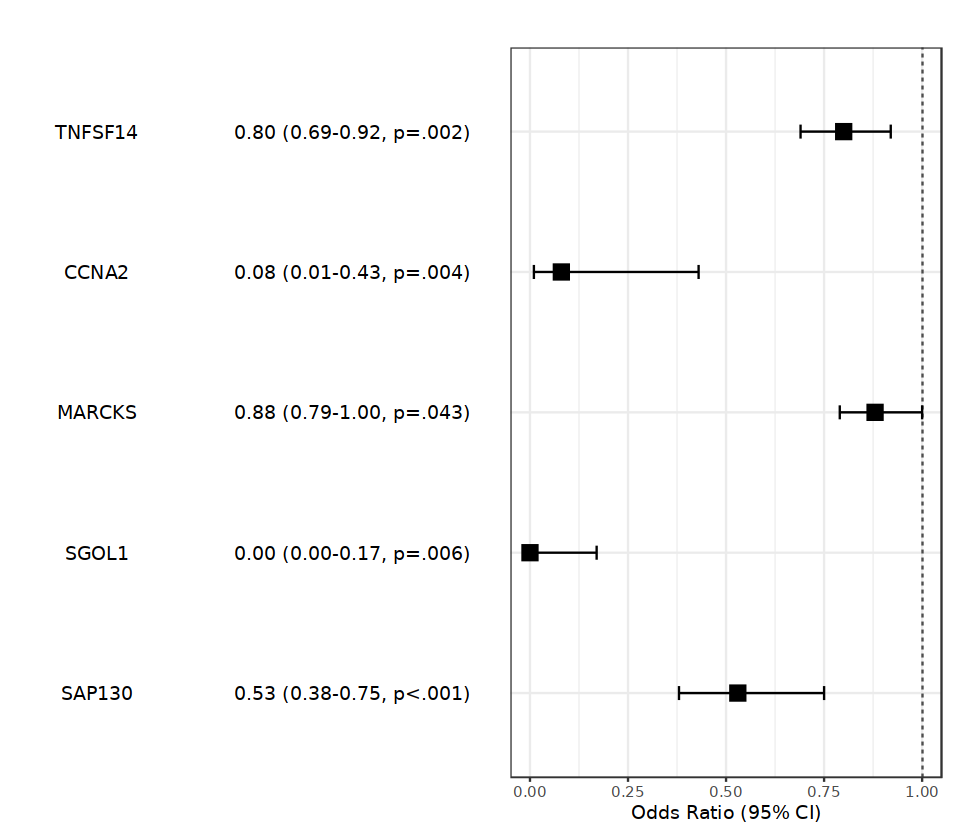

In [106]:
modelPlot(overall.log,change.pointsize = T)

In [107]:
tend = expr3

In [108]:
tend$Group = ifelse(tend$Group == 1, 'CI','H')

In [109]:
model.gene

[1] "RAB7A"     "CMTM1"     "PLP2"      "RPL28"     "OTX1"      "NEK2"     
 [7] "TNFSF14"   "SGOL1"     "SP110"     "SAP130"    "CEP55"     "TPM3"     
[13] "CCNA2"     "MARCKS"    "U2AF1L4"   "S100A11"   "ZNF608"    "RRM2"     
[19] "HIST2H2BE" "TLR5"

In [110]:
model.gene = c('TNFSF14','CCNA2','MARCKS','SGOL1','SAP130')

In [111]:
tend = tend[,c('Group',model.gene)]

In [112]:
head(tend,2)

,Group,TNFSF14,CCNA2,MARCKS,SGOL1,SAP130
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CI10_M1,CI,12.33071,1.3665421,13.45120,0.9586298,11.27051
CI11_M1,CI,26.09770,0.8565347,22.73914,0.4597942,13.74484


In [113]:
require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

Loading required package: cowplot

Warning message:
"package 'cowplot' was built under R version 4.2.3"
Loading required package: ggsci

Warning message:
"package 'ggsci' was built under R version 4.2.3"
Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 4.2.3"

Attaching package: 'ggpubr'


The following object is masked from 'package:cowplot':

    get_legend


The following object is masked from 'package:plyr':

    mutate


The following object is masked from 'package:VennDiagram':

    rotate




In [114]:
mydata<-tend %>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",TNFSF14:SAP130) %>% 
  ##
  dplyr::select(Group,gene,Expression) 

In [115]:
compare_means( Expression ~ Group, data = mydata, method = 't.test',
              group.by = "gene")
# Box plot facetted by "gene"
p <- ggboxplot(mydata, x = "Group", y = "Expression",
          color = "Group", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "Group", palette = "nejm",
          add = "jitter")

gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
TNFSF14,Expression,CI,H,4.057186e-06,1.6e-05,4.1e-06,****,T-test
CCNA2,Expression,CI,H,9.307185e-05,2.2e-04,9.3e-05,****,T-test
MARCKS,Expression,CI,H,7.311824e-05,2.2e-04,7.3e-05,****,T-test
SGOL1,Expression,CI,H,2.097678e-03,2.1e-03,0.0021,**,T-test
SAP130,Expression,CI,H,3.233072e-08,1.6e-07,3.2e-08,****,T-test


In [116]:
diffgene = as.data.frame(compare_means( Expression ~ Group, data = mydata, method = 't.test',
              group.by = "gene"))

In [ ]:
diffgene = rownames(diffgene) = diffgene[,1]

options(repr.plot.height = 5,repr.plot.width = 21)

options(repr.plot.width = 7,repr.plot.height = 5)

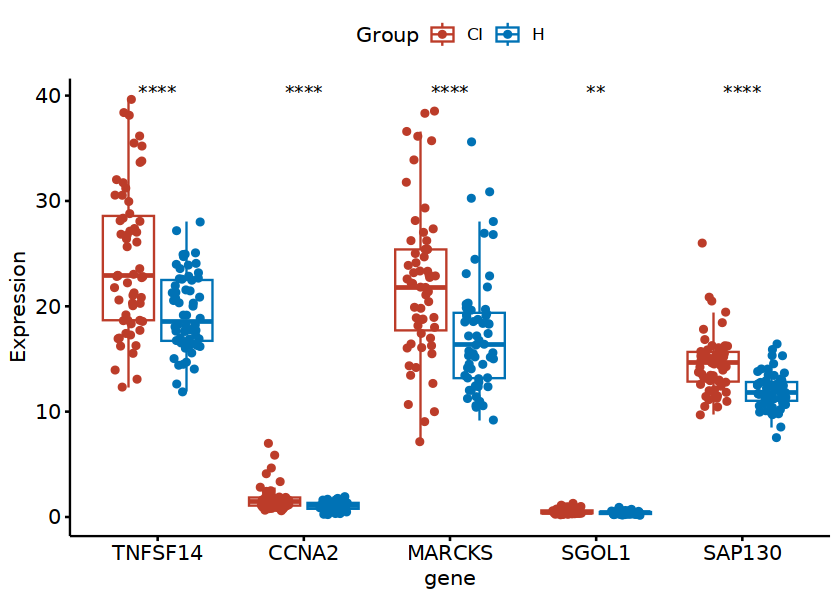

In [120]:
p + stat_compare_means(aes(group = Group), label = "p.signif",method = 't.test')

In [121]:
tend1 = tend[,c( 2:6)] 

In [122]:
gene_cor <- cor(tend1, method = 'pearson')

In [123]:
diag(gene_cor) <- 0
gene_cor <- reshape2::melt(gene_cor)
gene_cor <- subset(gene_cor, value != 0)  #去除0值的相关性
head(gene_cor)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
2,CCNA2,TNFSF14,-0.06566354
3,MARCKS,TNFSF14,0.44125543
4,SGOL1,TNFSF14,-0.19477187
5,SAP130,TNFSF14,0.29641398
6,TNFSF14,CCNA2,-0.06566354
8,MARCKS,CCNA2,0.05135958


In [124]:
library(circlize)
pdf('cor.circle.pdf',height = 6,width = 6)
p= chordDiagram(gene_cor, 
    annotationTrack = c('grid', 'name', 'axis'), #绘制外周圆弧区，显示名称和刻度轴
    grid.col = c(TNFSF14 = 'green3', CCNA2 = 'red', MARCKS = 'orange', SGOL1 = 'purple', SAP130 = 'skyblue'), #定义基因颜色
    col = colorRamp2(c(-1, 0, 1), c('green', 'white', 'red'), transparency = 0.5), #根据相关性大小展示连线的颜色范围
    annotationTrackHeight = c(0.05, 0.05), #名称离圆弧的距离，以及圆弧的宽度
)
dev.off()

circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




png 
  2

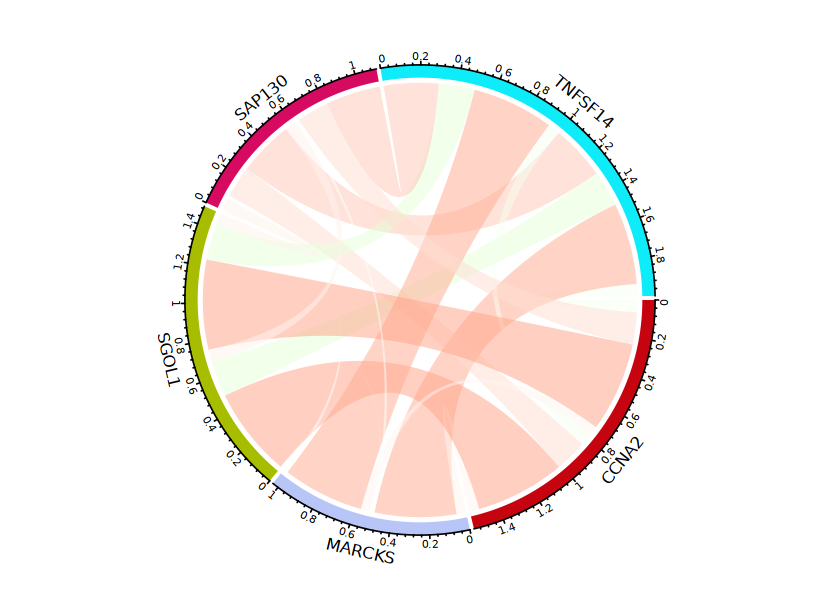

In [125]:
chordDiagram(gene_cor, 
    annotationTrack = c('grid', 'name', 'axis'), #绘制外周圆弧区，显示名称和刻度轴
    #grid.col = c(GABRD = 'green3', PLVAP = 'red', CDKN3 = 'orange', CDC25C = 'purple', UBE2T = 'skyblue', SKA1 = 'blue'), #定义基因颜色
    col = colorRamp2(c(-1, 0, 1), c('green', 'white', 'red'), transparency = 0.5), #根据相关性大小展示连线的颜色范围
    annotationTrackHeight = c(0.05, 0.05), )#名称离圆弧的距离，以及圆弧的宽度

In [129]:
save(data,file = 'data.rda')

In [130]:
library(autoReg)

In [131]:
logreg4<-autoReg(fit.reduce,uni=TRUE,threshold=0.05, final=T)   #final=T逐步回归
logreg4
logtable4<-myft(logreg4)

name,desc,1 (N=59),0 (N=60),id,OR (univariable),OR (multivariable),OR (final)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TNFSF14,Mean <U+00B1> SD,24.4 <U+00B1> 6.8,19.4 <U+00B1> 3.7,TNFSF14,"0.84 (0.77-0.91, p<.001)","0.79 (0.68-0.91, p=.001)","0.79 (0.68-0.91, p=.001)"
CCNA2,Mean <U+00B1> SD,1.7 <U+00B1> 1.2,1.1 <U+00B1> 0.4,CCNA2,"0.17 (0.07-0.42, p<.001)","0.04 (0.01-0.25, p<.001)","0.04 (0.01-0.25, p<.001)"
MARCKS,Mean <U+00B1> SD,22.1 <U+00B1> 7.0,17.3 <U+00B1> 5.5,MARCKS,"0.88 (0.83-0.94, p<.001)","0.87 (0.77-0.98, p=.018)","0.87 (0.77-0.98, p=.018)"
SGOL1,Mean <U+00B1> SD,0.5 <U+00B1> 0.2,0.4 <U+00B1> 0.2,SGOL1,"0.04 (0.00-0.36, p=.004)","0.00 (0.00-0.10, p=.002)","0.00 (0.00-0.10, p=.002)"
SAP130,Mean <U+00B1> SD,14.5 <U+00B1> 2.8,12.0 <U+00B1> 1.7,SAP130,"0.55 (0.43-0.70, p<.001)","0.51 (0.36-0.71, p<.001)","0.51 (0.36-0.71, p<.001)"
